# MLSR


### Data_set: 
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

1. id = listing ID
2. name = name of the listing
3. host_id = host ID
4. host_name = name of the host
5. neighbourhood_group = location
6. neighbourhood = area
7. latitude = latitude coordinates
8. longitude = longitude coordinates
9. room_type = listing space type
10. price = price in dollars (Target variable)
11. minimum_nights = amount of nights minimum
12. number_of_reviews = number of reviews
13. last_review = latest review
14. reviews_per_month = number of reviews per month
15. calculated_host_listings_count = amount of listing per host
16. availability_365 = number of days when listing is available for booking

### 1.	 Read the dataset (tab, csv, xls, txt, inbuilt dataset) 






In [ ]:
# Kindly change the below cells from markdown to code and execute it 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
matplotlib.rcParams['font.family'] = "Arial"
import collections
import itertools
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p
import statsmodels
import statsmodels.api as sm
#print(statsmodels.__version__)
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.utils import resample
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
import warnings                                          # importing warnings to warn programmers about changes in language or library features
warnings.filterwarnings('ignore')                        # ignoring warnings
import random                                            # importing generating or manipulating random integers 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new_york_city_air.csv to new_york_city_air (1).csv


In [ ]:
import pandas as pd

import csv

with open("new_york_city_air.csv","r")as file:

    reader=csv.reader(file)
    
df=pd.read_csv("new_york_city_air.csv")

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12598446,Spacious 4bdrm next to CentralPk,5162192,Amy,Manhattan,Upper West Side,40.79860,-73.96229,Entire home/apt,275,30,4,09-01-2019,0.15,12,199
1,13585495,Great room in amazing Little Italy location!,15960548,Nathan,Manhattan,Little Italy,40.71955,-73.99707,Private room,110,2,1,14-09-2016,0.03,1,0
2,27761683,"Clean Cozy Room, Queens-5 min walk to subway (...",199524563,Bei,Queens,Rego Park,40.72678,-73.86218,Private room,55,2,25,22-06-2019,2.37,3,38
3,14200678,Charming 1 bdr apt. just 17 mins from MANHATTAN!,557669,Ryan,Queens,Woodside,40.74663,-73.89653,Entire home/apt,96,2,1,08-08-2016,0.03,1,0
4,24540935,A Beach House in Brooklyn,51068857,Derek,Brooklyn,Bedford-Stuyvesant,40.68297,-73.95251,Private room,80,1,0,NaN,NaN,1,5


### 2.	Data Understanding
#### Summarize important observations from the data set (5 Marks)
Some pointers which would help you, but don’t be limited by these

a.	What are the number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


a. What are the number of rows; 

In [ ]:
df.shape 

(1054, 16)

In [ ]:
df.shape[0]

1054

no. of variables 

In [ ]:
df.shape[1]

16

types of variables (continuous, categorical etc.)|


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1054 non-null   int64  
 1   name                            1053 non-null   object 
 2   host_id                         1054 non-null   int64  
 3   host_name                       1054 non-null   object 
 4   neighbourhood_group             1054 non-null   object 
 5   neighbourhood                   1054 non-null   object 
 6   latitude                        1054 non-null   float64
 7   longitude                       1054 non-null   float64
 8   room_type                       1054 non-null   object 
 9   price                           1054 non-null   int64  
 10  minimum_nights                  1054 non-null   int64  
 11  number_of_reviews               1054 non-null   int64  
 12  last_review                     84

In [ ]:
df=df.astype({"id":'object', "host_id":'object'})
df['last_review']=pd.to_datetime(df['last_review'],infer_datetime_format=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1054 non-null   object        
 1   name                            1053 non-null   object        
 2   host_id                         1054 non-null   object        
 3   host_name                       1054 non-null   object        
 4   neighbourhood_group             1054 non-null   object        
 5   neighbourhood                   1054 non-null   object        
 6   latitude                        1054 non-null   float64       
 7   longitude                       1054 non-null   float64       
 8   room_type                       1054 non-null   object        
 9   price                           1054 non-null   int64         
 10  minimum_nights                  1054 non-null   int64         
 11  numb

In [ ]:
df.dtypes.value_counts()

object            7
int64             5
float64           3
datetime64[ns]    1
dtype: int64

categorical variables

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()   #convert the object elements of an array into a list
categorical_cols

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type']

numerical variables

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()   #convert the object elements of an array into a list
numerical_cols

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

b. Calculate five point summary for numerical variables

In [ ]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,844.000000,1054.000000,1054.000000
mean,40.728377,-73.951802,149.699241,8.002846,24.620493,1.347690,6.959203,111.572106
std,0.056092,0.049034,156.239782,34.580253,49.178939,1.675154,31.266268,129.835933
min,40.499790,-74.240840,10.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,40.689253,-73.983770,70.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.721665,-73.956930,104.000000,3.000000,6.000000,0.730000,1.000000,43.500000
75%,40.761120,-73.935523,179.000000,5.000000,24.000000,1.990000,2.000000,223.750000
max,40.898730,-73.731700,2000.000000,999.000000,426.000000,15.320000,327.000000,365.000000


c.	Summarize observations for categorical variables – no. of categories, % observations in each category

 Summarize observations for categorical variables

In [ ]:
# get the summary output for categorical variable
df.describe(include = "object")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type
count,1054,1053,1054,1054,1054,1054,1054
unique,1054,1050,1018,779,5,123,3
top,12598446,New york Multi-unit building,219517861,Alex,Manhattan,Williamsburg,Entire home/apt
freq,1,2,6,13,449,92,539


no. of categories, % observations in each category

neighbourhood_group

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        449
Brooklyn         431
Queens           130
Bronx             34
Staten Island     10
Name: neighbourhood_group, dtype: int64

In [ ]:
s = df.neighbourhood_group
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
Manhattan,449,0.425996,42.6%
Brooklyn,431,0.408918,40.9%
Queens,130,0.123340,12.3%
Bronx,34,0.032258,3.2%
Staten Island,10,0.009488,0.9%


neighbourhood	

In [ ]:
df['neighbourhood'].value_counts()

Williamsburg          92
Bedford-Stuyvesant    76
Bushwick              53
Upper West Side       49
Hell's Kitchen        46
                      ..
Tribeca                1
Kew Gardens            1
Morris Park            1
Randall Manor          1
Huguenot               1
Name: neighbourhood, Length: 123, dtype: int64

In [ ]:
s = df.neighbourhood
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
Williamsburg,92,0.087287,8.7%
Bedford-Stuyvesant,76,0.072106,7.2%
Bushwick,53,0.050285,5.0%
Upper West Side,49,0.046490,4.6%
Hell's Kitchen,46,0.043643,4.4%
...,...,...,...
Tribeca,1,0.000949,0.1%
Kew Gardens,1,0.000949,0.1%
Morris Park,1,0.000949,0.1%
Randall Manor,1,0.000949,0.1%


room_type

In [ ]:
df['room_type'].value_counts().count()

3

In [ ]:
df['room_type'].value_counts()

Entire home/apt    539
Private room       482
Shared room         33
Name: room_type, dtype: int64

In [ ]:
s = df.room_type
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
Entire home/apt,539,0.511385,51.1%
Private room,482,0.457306,45.7%
Shared room,33,0.031309,3.1%


### 3.	Data Preparation
#### Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)
Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the data normally distributed? Is it a defect? Why or why not? 


a. Do variables have missing/null values?

In [ ]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
last_review,210,19.924099,datetime64[ns]
reviews_per_month,210,19.924099,float64
name,1,0.094877,object
id,0,0.000000,object
host_id,0,0.000000,object
host_name,0,0.000000,object
neighbourhood_group,0,0.000000,object
neighbourhood,0,0.000000,object
latitude,0,0.000000,float64
longitude,0,0.000000,float64


filling missing values in reviews_per_month

In [ ]:
# reviews per month feature is numerical, so lets impute with mean(Handled outliers)
mean_imputer = SimpleImputer(strategy='mean')
df['reviews_per_month'] = mean_imputer.fit_transform(df['reviews_per_month'].values.reshape(-1,1))

filling missing values in last_review

In [ ]:
# replace all the missing values with 'Medium'
df.last_review.replace(np.NaN,df.last_review.mode()[0] ,inplace = True)

filling zero values in availability_365

In [ ]:
df.availability_365.replace(np.NaN,df.availability_365.mean() ,inplace = True)

In [ ]:
df.last_review.mode()[0]

Timestamp('2019-01-07 00:00:00')

In [ ]:
df.last_review.replace(pd.NaT,df.last_review.mode()[0] ,inplace = True)

b. Do variables have outliers?

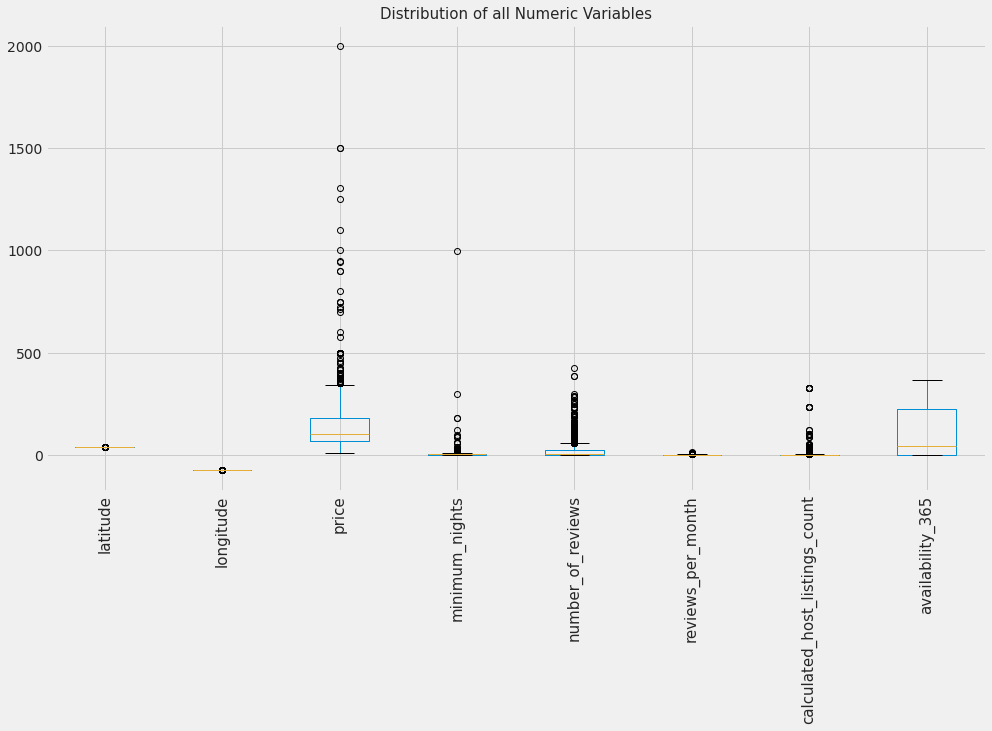

In [ ]:
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

removing outliers

In [ ]:

numerical_col = df.select_dtypes(include='number')                  # selecting the numeric features to form numeric dataframe  

i = 1
for col_name in numerical_col:
    
    q1=df[col_name].quantile(0.25)
    q3=df[col_name].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    for ind1 in df[col_name].index:
      if df[col_name].loc[ind1]>ub:
        df[col_name].loc[ind1]=ub
      elif df[col_name].loc[ind1]<lb:
        df[col_name].loc[ind1]=lb

    i +=1

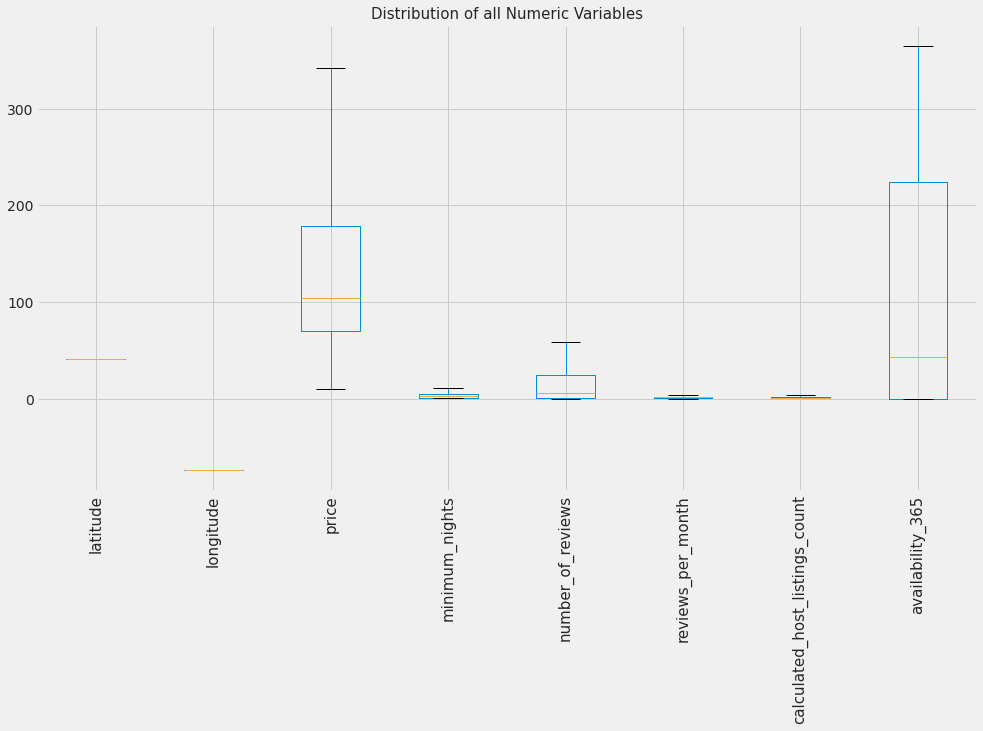

In [ ]:
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [ ]:
df.shape

(1054, 16)

c. Is the data normally distributed? Is it a defect? Why or why not?

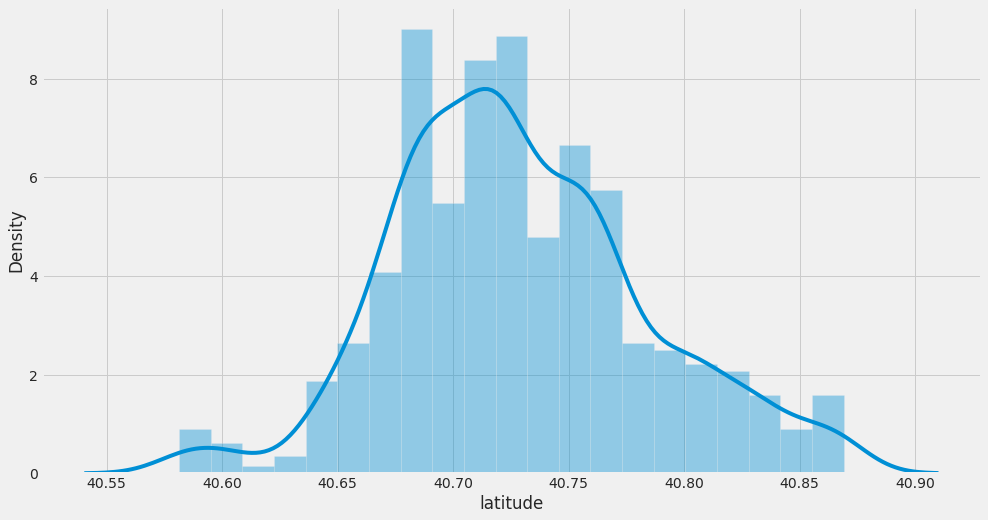

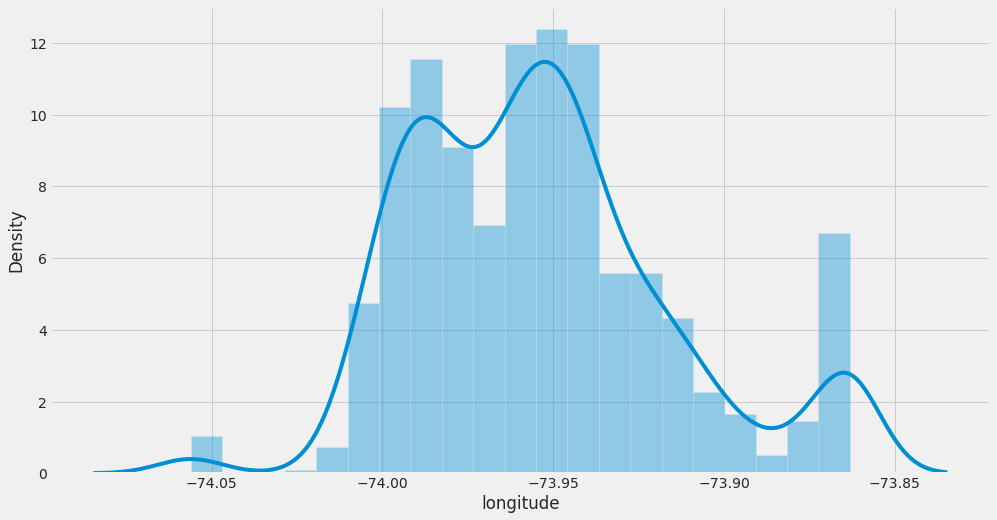

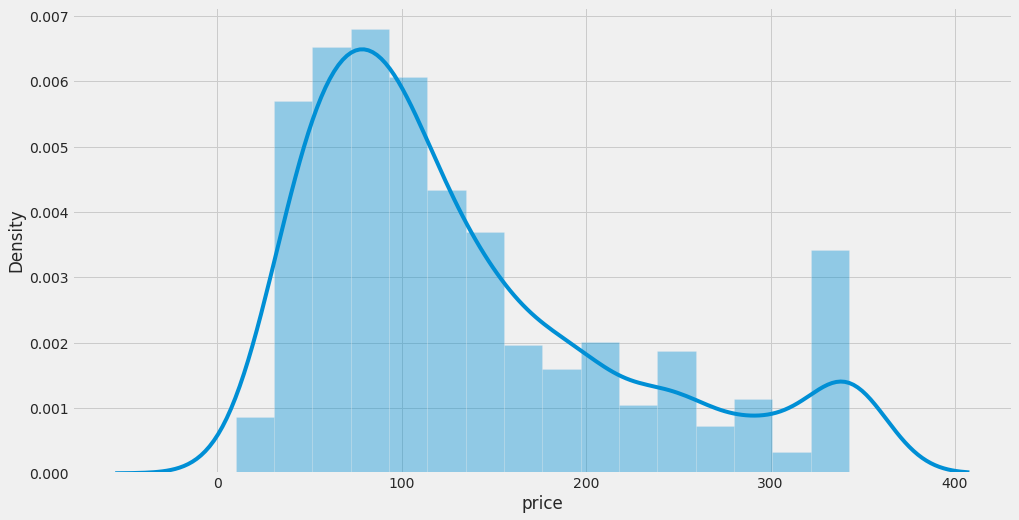

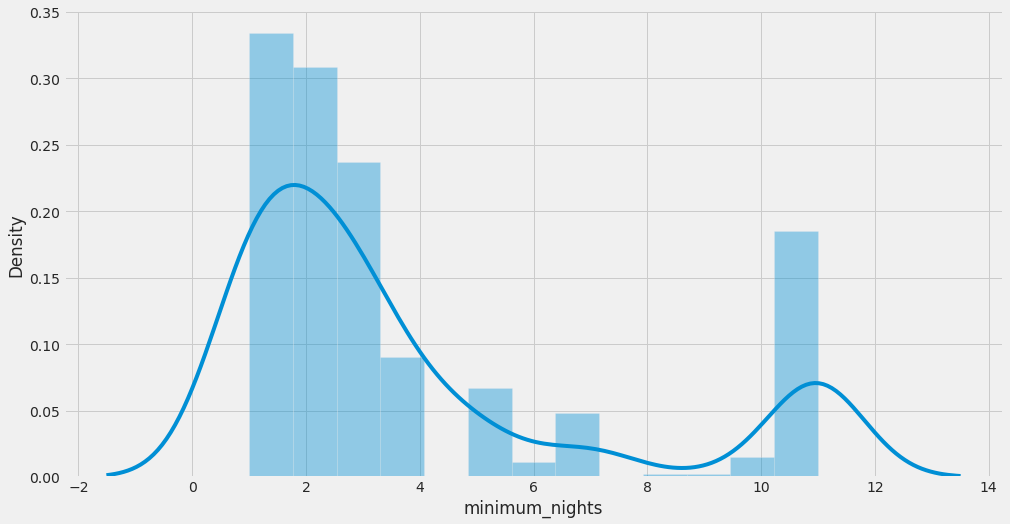

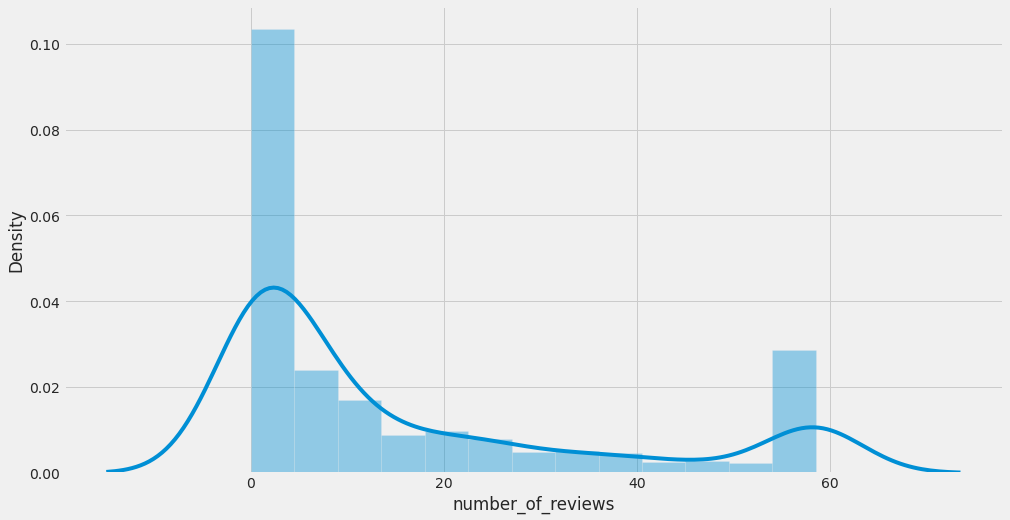

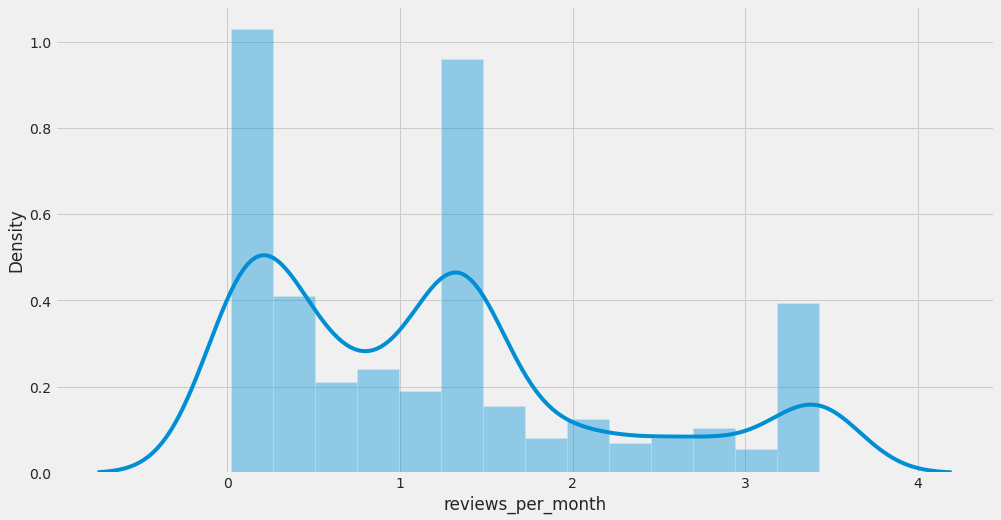

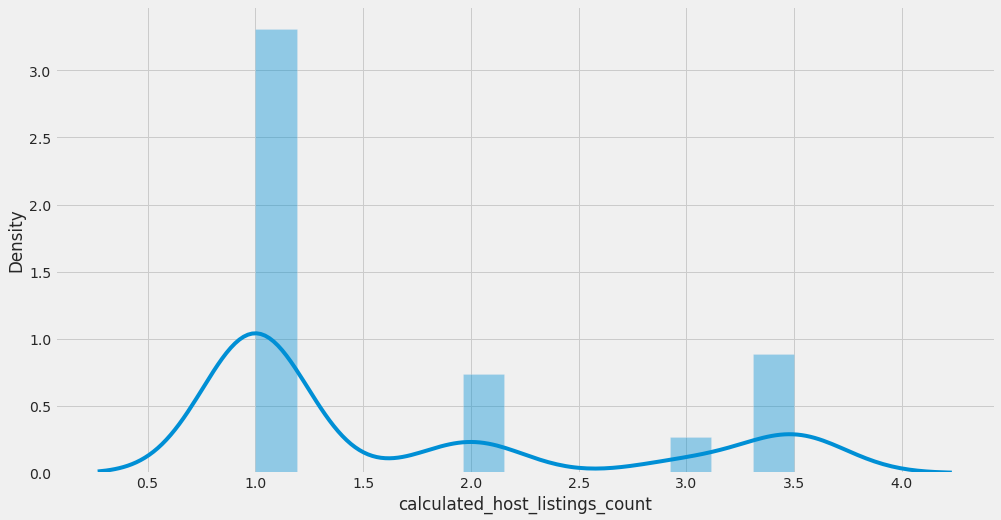

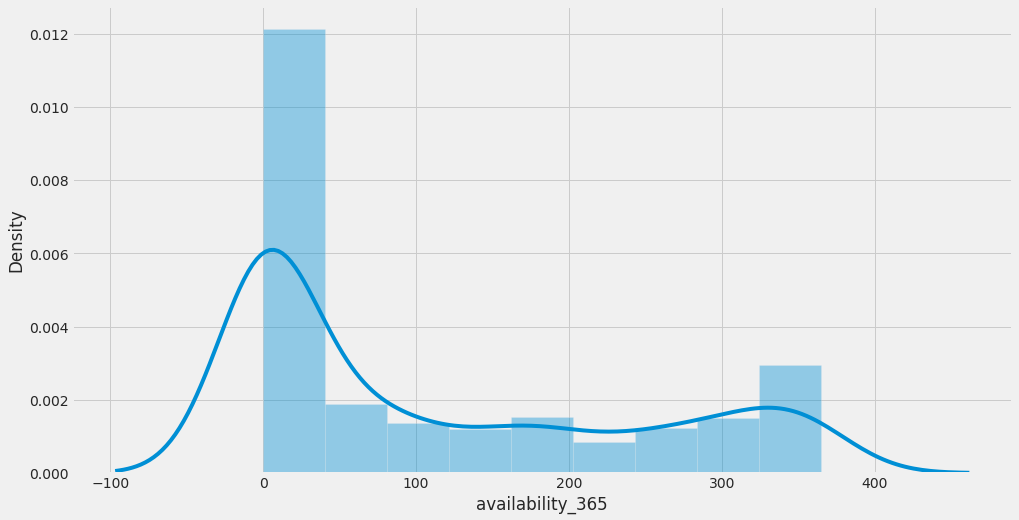

In [ ]:
for column in numerical_col:
    sns.distplot(df[column])
    plt.show()

### 4.	Summarize relationships among variables (5 marks)               
a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

 Hint: based on your observations you may want to transform features or create additional features.


a. Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

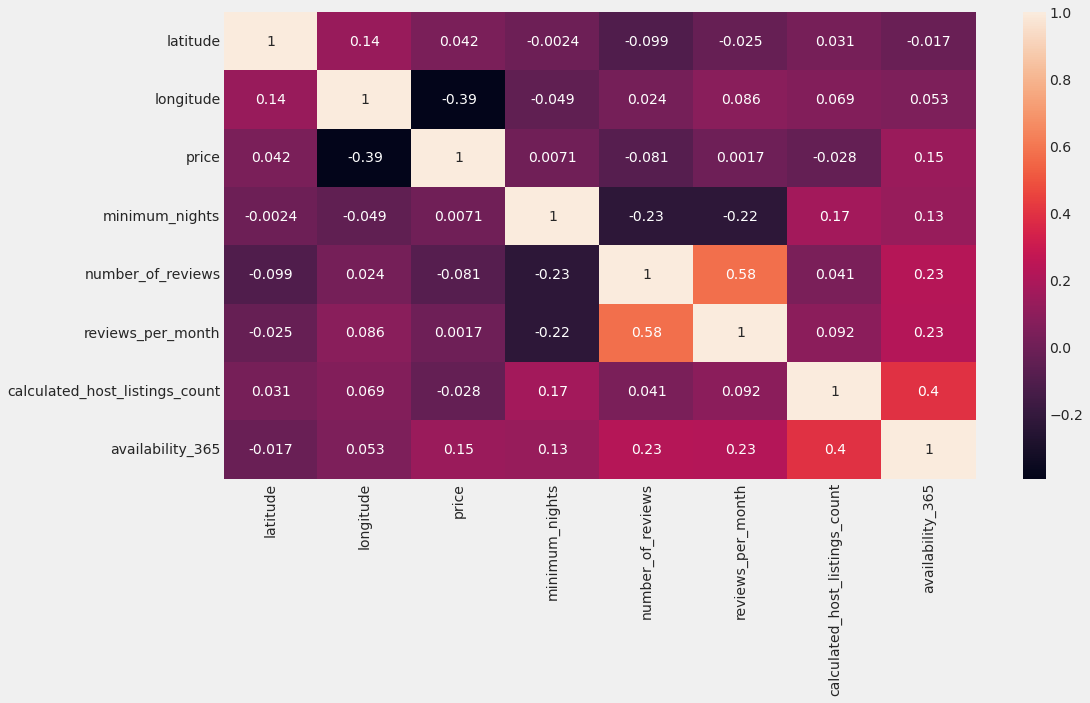

In [ ]:
 #plotting the heatmap for correlation
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

price vs availability_365 are the variables most correlated with Target<br>
number_of_reviews vs reviews_per_month are independent variables correlated among themselves

In [ ]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
df.drop(['id','name','host_name','host_id','last_review'], axis=1, inplace=True)
df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Upper West Side,40.79860,-73.962290,Entire home/apt,275.0,11,4.0,0.15000,3.5,199
1,Manhattan,Little Italy,40.71955,-73.997070,Private room,110.0,2,1.0,0.03000,1.0,0
2,Queens,Rego Park,40.72678,-73.863151,Private room,55.0,2,25.0,2.37000,3.0,38
3,Queens,Woodside,40.74663,-73.896530,Entire home/apt,96.0,2,1.0,0.03000,1.0,0
4,Brooklyn,Bedford-Stuyvesant,40.68297,-73.952510,Private room,80.0,1,0.0,1.34769,1.0,5


b. Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

frequency encoding

In [ ]:
# frequency encoding on 'Item_Type'
# size of each category
encoding = df.groupby('neighbourhood_group').size()

# get frequency of each category
encoding = encoding/len(df)

# encode the column
# map(): apply encoding to each item in the variable
# and multiply by 100
df['freq_enc_neighbourhood_group'] = df.neighbourhood_group.map(encoding)*100

In [ ]:
# frequency encoding on 'Item_Type'
# size of each category
encoding = df.groupby('neighbourhood').size()

# get frequency of each category
encoding = encoding/len(df)

# encode the column
# map(): apply encoding to each item in the variable
# and multiply by 100
df['freq_enc_neighbourhood'] = df.neighbourhood.map(encoding)*100


In [ ]:
# frequency encoding on 'Item_Type'
# size of each category
encoding = df.groupby('room_type').size()

# get frequency of each category
encoding = encoding/len(df)

# encode the column
# map(): apply encoding to each item in the variable
# and multiply by 100
df['freq_enc_room_type'] = df.room_type.map(encoding)*100

# print first five rows of the data
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,freq_enc_neighbourhood_group,freq_enc_neighbourhood,freq_enc_room_type
0,Manhattan,Upper West Side,40.79860,-73.962290,Entire home/apt,275.0,11,4.0,0.15000,3.5,199,42.599620,4.648956,51.13852
1,Manhattan,Little Italy,40.71955,-73.997070,Private room,110.0,2,1.0,0.03000,1.0,0,42.599620,0.379507,45.73055
2,Queens,Rego Park,40.72678,-73.863151,Private room,55.0,2,25.0,2.37000,3.0,38,12.333966,0.284630,45.73055
3,Queens,Woodside,40.74663,-73.896530,Entire home/apt,96.0,2,1.0,0.03000,1.0,0,12.333966,1.328273,51.13852
4,Brooklyn,Bedford-Stuyvesant,40.68297,-73.952510,Private room,80.0,1,0.0,1.34769,1.0,5,40.891841,7.210626,45.73055


In [ ]:
df.drop(['neighbourhood_group','neighbourhood','room_type'], axis = 1,inplace=True)

<Figure size 1728x2592 with 0 Axes>

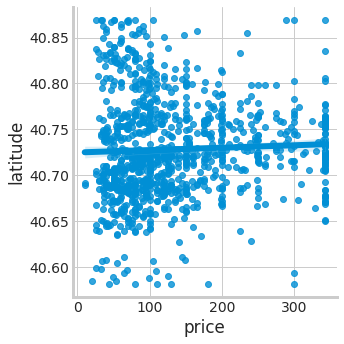

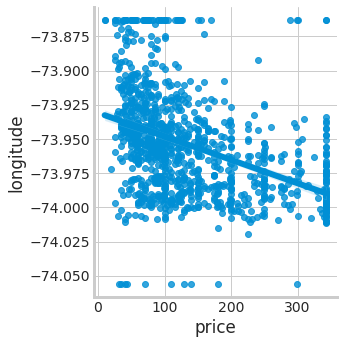

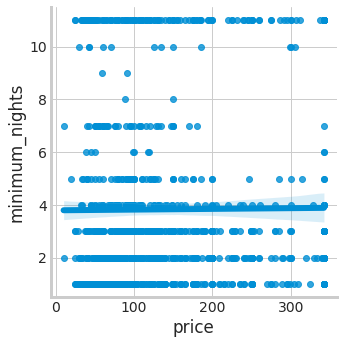

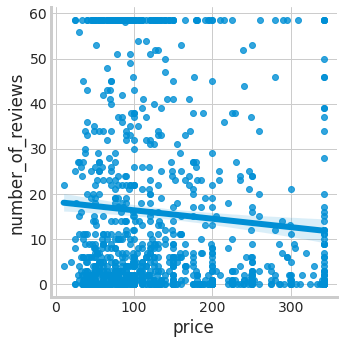

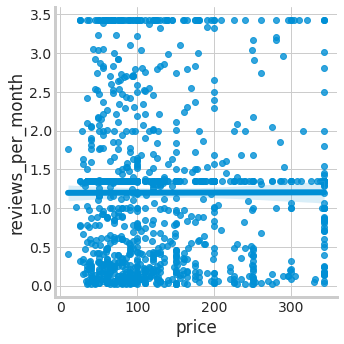

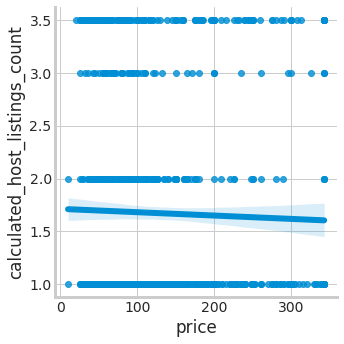

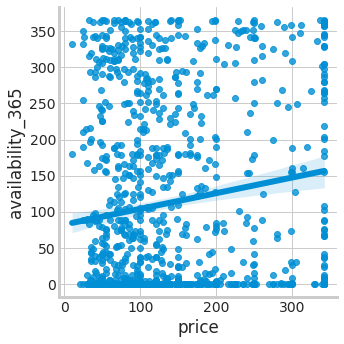

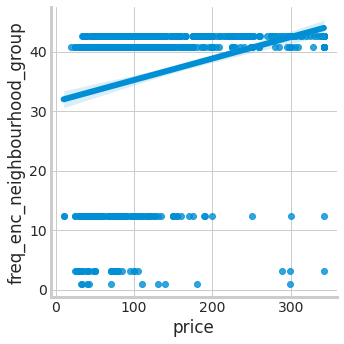

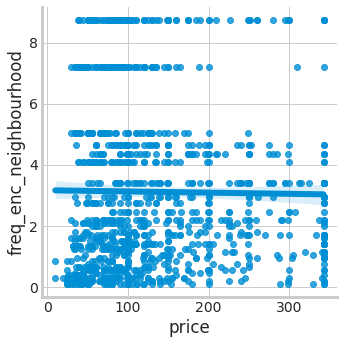

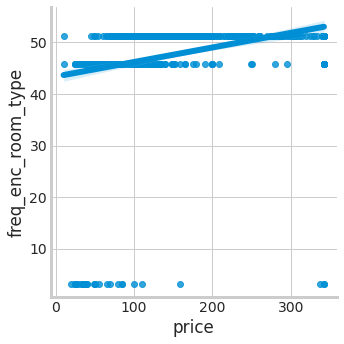

In [ ]:
plt.figure(figsize=(24,36))
plt.subplots_adjust(wspace=1, hspace=None)
cols = df.loc[:, df.columns != 'price']

for col_name in cols:
    sns.set_style('whitegrid')
    sns.lmplot(x ='price', y = col_name , data = df)

    #df.plot(x = 'price', y =col_name, kind = 'scatter',colormap = 'magma');
    #plt.scatter(df['price'],col_name,c ="pink",linewidths = 2,marker ="s",edgecolor ="green",s = 50)

## 5.	Split dataset into train and test (70:30) (1 MARKS)

#### a.Are both train and test representative of the overall data? How would you ascertain this statistically?


In [ ]:
# select the target variable
Y = df['price']

# select all the independent variables
# by dropping the target variable
X = df.drop(['price'], axis = 1)

In [ ]:
# let us now split the dataset into train & test
# test_size: the proportion of data to be included in the testing set
xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size = 0.30, random_state=100)

In [ ]:
print(X.shape)
print(xtrain.shape)
print(xtest.shape)

(1054, 10)
(737, 10)
(317, 10)


In [ ]:
print(Y.shape)
print(ytrain.shape)
print(ytest.shape)

(1054,)
(737,)
(317,)


###  6.	Fit a base model. Please write your key observations (14 marks) 

a. Fit the Linear Regression Model	

b. What is the overall R2? Please comment on whether it is good or not. 

c.	What is the adjusted R2? Is it different from R2? Why?

d.	Which variables are significant?


a. Fit the Linear Regression Model

In [ ]:
# filter the numerical features in the dataset
df_numeric_features_vif = X.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,freq_enc_neighbourhood_group,freq_enc_neighbourhood,freq_enc_room_type
0,40.79860,-73.962290,11,4.0,0.15000,3.5,199,42.599620,4.648956,51.13852
1,40.71955,-73.997070,2,1.0,0.03000,1.0,0,42.599620,0.379507,45.73055
2,40.72678,-73.863151,2,25.0,2.37000,3.0,38,12.333966,0.284630,45.73055
3,40.74663,-73.896530,2,1.0,0.03000,1.0,0,12.333966,1.328273,51.13852
4,40.68297,-73.952510,1,0.0,1.34769,1.0,5,40.891841,7.210626,45.73055


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,488618.641700,longitude
1,486960.693290,latitude
2,35.251367,freq_enc_room_type
3,13.807684,freq_enc_neighbourhood_group
4,4.895051,calculated_host_listings_count
5,3.669765,reviews_per_month
6,2.910129,freq_enc_neighbourhood
7,2.648234,minimum_nights
8,2.551458,number_of_reviews
9,2.270774,availability_365


In [ ]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(ytrain, xtrain).fit()

# print the summary output
print(MLR_full_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.768
Method:                 Least Squares   F-statistic:                              245.5
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                   2.23e-225
Time:                        14:19:05   Log-Likelihood:                         -4253.4
No. Observations:                 737   AIC:                                      8527.
Df Residuals:                     727   BIC:                                      8573.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

Interpretation: The R-squared value obtained from this model is 0.3 which means that the above model explains a 30% of the variation in the price. 
The Durbin-Watson test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is far from 2 (= 2.050) which means there is autocorrelation.

The Jarque-Bera test is used to check the normality of the residuals. Here, the p-value of the test is less than 1.665; that implies the residuals are not normally distributed.

Also, the 'Cond. No' 2.56...(1.94e+16) represents the Condition Number (CN) that is used to check the multicollinearity.

If CN < 100: no multicollinearity.
If CN is between 100 and 1000: moderate multicollinearity
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data.

In [ ]:
y_pred = MLR_full_model.predict(xtest)
y_pred

311     149.508070
240     154.115993
1034    166.277001
562      18.684517
982     107.324045
           ...    
402     197.344572
737     137.064379
372     163.604941
885     165.659413
454     116.931295
Length: 317, dtype: float64

In [ ]:
# calculate p-values for all the independent variables in the MLR_model
# create a dataframe containing p-values 
# pass the column name to the parameter 'columns'
MLR_pvalues = pd.DataFrame(MLR_full_model.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
latitude,8.904520e-01
longitude,9.224614e-01
minimum_nights,7.075467e-02
number_of_reviews,1.443469e-06
reviews_per_month,1.717453e-01
calculated_host_listings_count,5.155501e-01
availability_365,1.998106e-07
freq_enc_neighbourhood_group,3.648212e-13
freq_enc_neighbourhood,2.563249e-04
freq_enc_room_type,6.060393e-21


In [ ]:
# subset the dataframe 'MLR_pvalues' such that the variables will have p-value greater than 0.05
# store the subset of a dataframe to a new dataframe 'insignificant_var' 
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['longitude',
 'minimum_nights',
 'reviews_per_month',
 'calculated_host_listings_count']

In [ ]:
# drop the insignificant variables from the dataframe 'X_train_signi_var'
# 'axis = 1' drops the corresponding column(s)
xtrain = xtrain.drop(insigni_var, axis=1)

# drop the insignificant variables from the dataframe 'X_test_signi_var'
# 'axis = 1' drops the corresponding column(s)
xtest = xtest.drop(insigni_var, axis=1)

# building a model on training dataset
# fit() is used to fit the OLS model
MLR_model_with_significant_var = sm.OLS(ytrain, xtrain).fit()

# print the summary output
print(MLR_model_with_significant_var.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.768
Method:                 Least Squares   F-statistic:                              406.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                   5.09e-229
Time:                        14:19:05   Log-Likelihood:                         -4256.8
No. Observations:                 737   AIC:                                      8526.
Df Residuals:                     731   BIC:                                      8553.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

Assumptions After MLR Model
Linear Relationship Between Dependent and Independent Variable
Autocorrelation
Heteroscedasticity
Tests of Normality

Linear Relationship

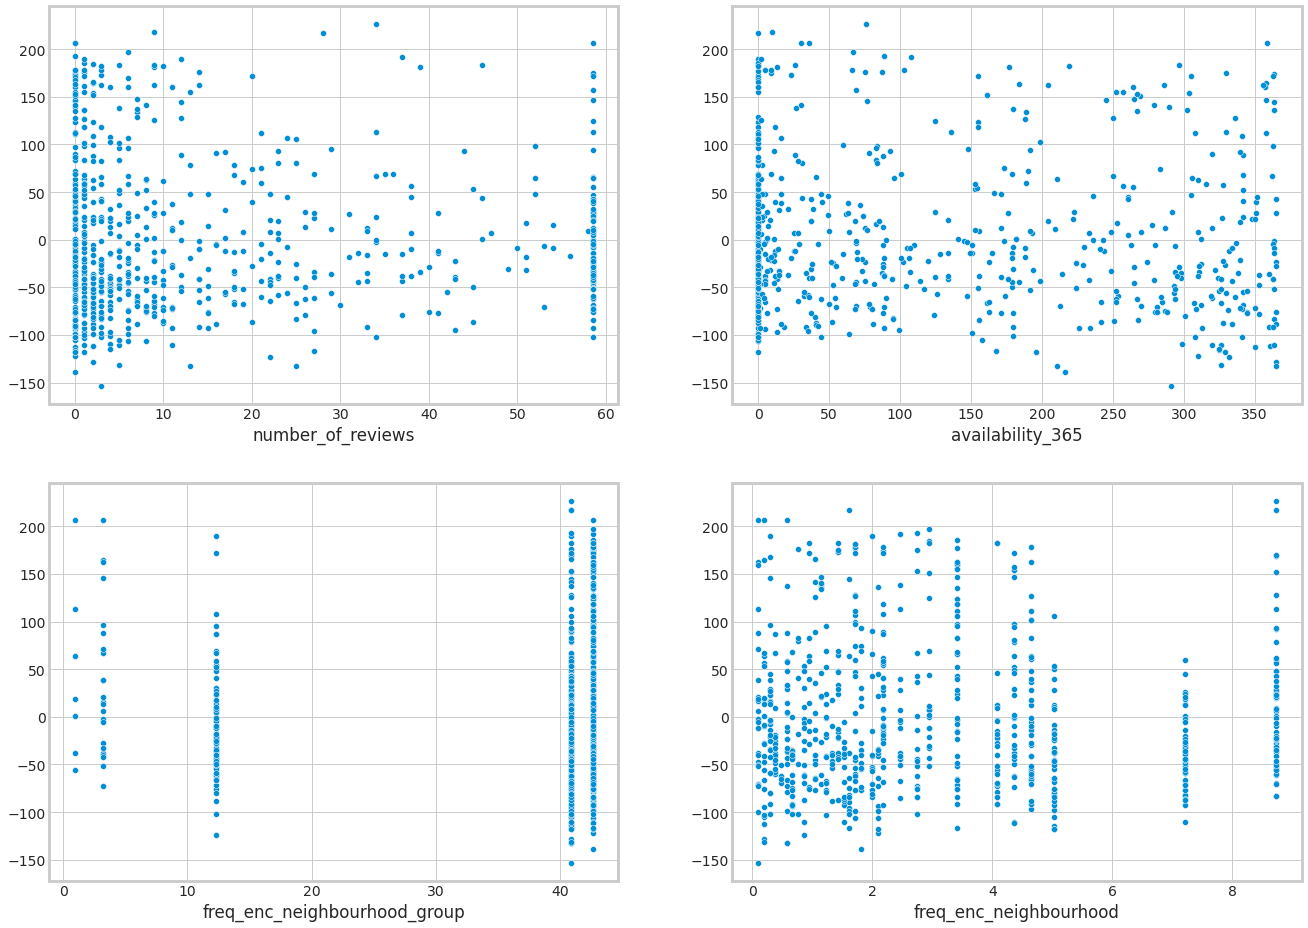

In [ ]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(xtrain.columns[1:5], ax.flatten()):
    sns.scatterplot(xtrain[variable], MLR_model_with_significant_var.resid , ax=subplot)

# display the plot
plt.show()

Interpretation: The above plots show no specific pattern, implies that there is a linearity present in the data.

Autocorrelation

In [ ]:
# print the model summary
print(MLR_model_with_significant_var.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.768
Method:                 Least Squares   F-statistic:                              406.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                   5.09e-229
Time:                        14:19:06   Log-Likelihood:                         -4256.8
No. Observations:                 737   AIC:                                      8526.
Df Residuals:                     731   BIC:                                      8553.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

From the above summary, we can observe that the value obtained from the Durbin-Watson test statistic is 
 2.046. Thus, we conclude that there is no autocorrelation.

Heteroskedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_model_with_significant_var.resid, MLR_model_with_significant_var.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 71.54763548905912), ('p-value', 4.285488053390449e-70)]

We observe that the p-value is greater than 0.05; thus, we conclude that there is no heteroskedasticity present in the data.

Tests for Normality

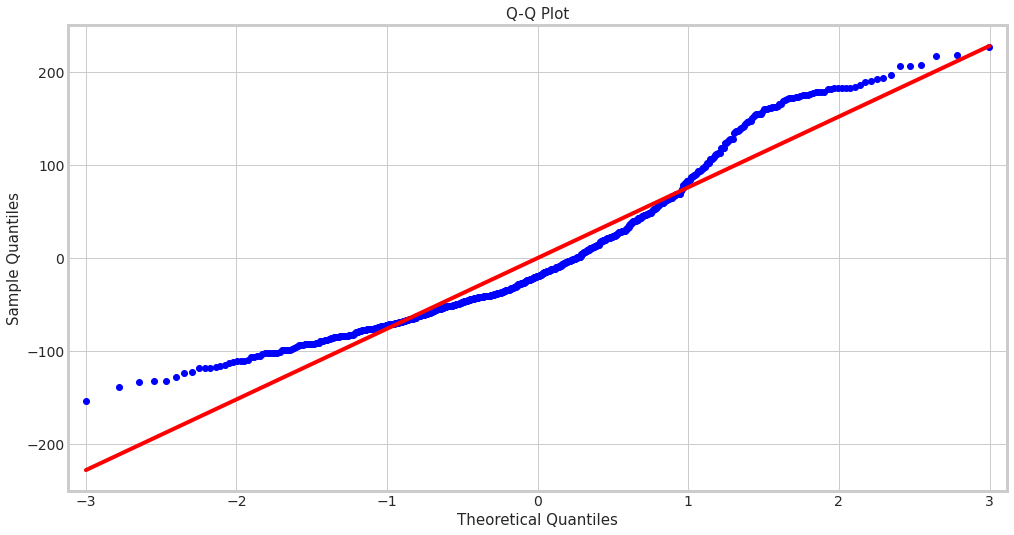

In [ ]:
from statsmodels.graphics.gofplots import qqplot
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_with_significant_var.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [ ]:
# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro
# perform Shapiro Wilk test using 'shapiro()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'shapiro()'
stat, p_value = shapiro(MLR_model_with_significant_var.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9310734868049622
P-Value: 6.457930563918883e-18


From the above test we can see that the p-value is 0.4 (greater than 0.05), thus we can say that the residuals are  normally distributed.

In [ ]:
r_sq_mlr = MLR_model_with_significant_var.rsquared

# print the value
r_sq_mlr

0.769429006851492

In [ ]:
# calculate adjusted R-Squared on train dataset
# use 'rsquared_adj' from statsmodel
adj_r_sq = MLR_model_with_significant_var.rsquared_adj

# print the value
adj_r_sq

0.7675364952798216

Model Performance

In [ ]:
train_pred = MLR_model_with_significant_var.predict(xtrain)

# predict the output of the target variable from the test data
test_pred = MLR_model_with_significant_var.predict(xtest)

In [ ]:
 #calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(ytrain, train_pred),4)

# print the MSE for the training set
print("Mean Squared Error (MSE) on training set: ", mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(ytest, test_pred),4)

# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  6087.2326
Mean Squared Error (MSE) on test set:  6416.5846


Root Mean Squared Error (RMSE)

In [ ]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(ytrain, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(ytest, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  78.0207
Root Mean Squared Error (RMSE) on test set:  80.1036


In [ ]:
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# calculate the MAE using the "mean_absolute_error" function

# calculate the MAE for the train data
# round the value upto 4 digits using 'round()'
mae_train = round(mean_absolute_error(ytrain, train_pred),4)

# print the MAE for the training set
print("Mean Absolute Error (MAE) on training set: ", mae_train)

# calculate the MAE for the test data
# round the value upto 4 digits using 'round()'
mae_test = round(mean_absolute_error(ytest, test_pred),4)

# print the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  62.3922
Mean Absolute Error (MAE) on test set:  61.4116


Mean Absolute Percentage Error (MAPE)

In [ ]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [ ]:
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(ytrain, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(ytest, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  68.2435
Mean Absolute Percentage Error (MAPE) on test set:  65.4131
